# **Numerieke Oplossing**

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### **Constanten**

In [157]:
dT = 0.5 # K
dt = 0.01 # s
dx = 0.001 # m
Tm = 54 + 273.15

l_l, rho_l, c_l = (0.15, 780, 2100)
l_s, rho_s, c_s = (0.24, 860, 2900)
L = 2.1e5 # J/kg

x = 0.3 # (m) Staaf lengte
t = 30*60 # (s) Simulatie tijd

T_0 = 20 + 273.15
T_x0 = 100 + 273.15
T_ref = Tm - dT

i_max, k_max = (int(x/dx), int(t/dt))

### **Variabelen die een functie van T zijn**

In [158]:
def theta_l(T):
    if T >= Tm + dT:
        return 1
    elif Tm - dT < T and T < Tm + dT:
        return (T - Tm + dT)/2/dT
    else:
        return 0

def theta_s(T):
    return 1 - theta_l(T)

def l_phi(T):
    return theta_l(T) * l_l + theta_s(T) * l_s

def rho_phi(T):
    return theta_l(T) * rho_l + theta_s(T) * rho_s

def dthetal_dT(T):
    if Tm - dT < T and T < Tm + dT:
        return 1/2/dT
    else:
        return 0

def cA(T):
    return theta_s(T)*rho_s*c_s + theta_l(T)*rho_l*c_l + ((rho_l*c_l - rho_s*c_s)*(T - T_ref) + rho_l*L) * dthetal_dT(T)

### **Oplossen**

100%|██████████| 179999/179999 [08:13<00:00, 364.98it/s]


[373.15       367.12241522 361.10660023 355.114007   349.15553
 343.24140968 337.38131967 331.58464732 327.16045378 325.25682609
 323.38568833 321.55409408 319.76867876 318.03547231 316.35975367
 314.74595508 313.19761779 311.71739547 310.30709687 308.96775699
 307.69972522 306.50275975 305.3761197  304.31864921 303.32885032
 302.40494374 301.54491855 300.74657266 300.00754648 299.32535177
 298.69739777 298.12101567 297.59348217 297.11204252 296.67393283
 296.27640152 295.91672945 295.59224855 295.30035844 295.03854102
 294.80437289 294.59553541 294.40982271 294.24514741 294.09954455
 293.97117358 293.85831882 293.75938844 293.67291218 293.59753813
 293.5320285  293.47525483 293.42619251 293.38391508 293.34758811
 293.31646307 293.28987102 293.26721649 293.24797139 293.23166914
 293.21789901 293.20630077 293.19655961 293.18840143 293.18158838
 293.17591482 293.17120356 293.16730248 293.16408141 293.16142933
 293.15925192 293.15746928 293.15601397 293.15482922 293.15386747
 293.15308895

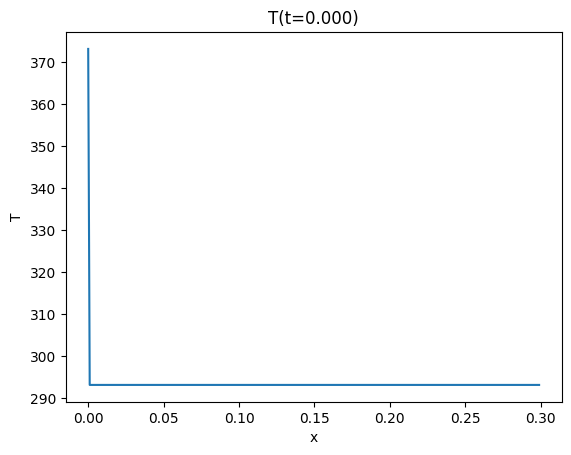

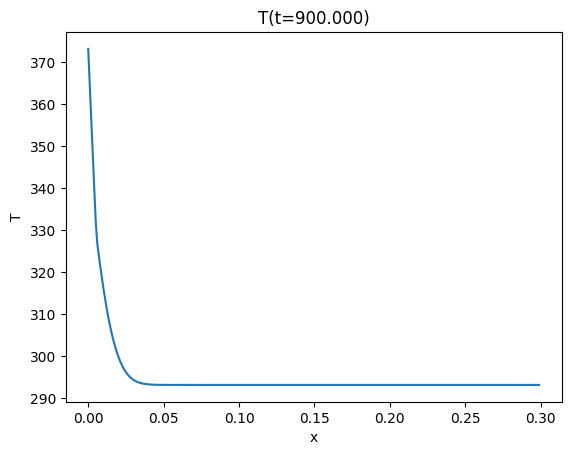

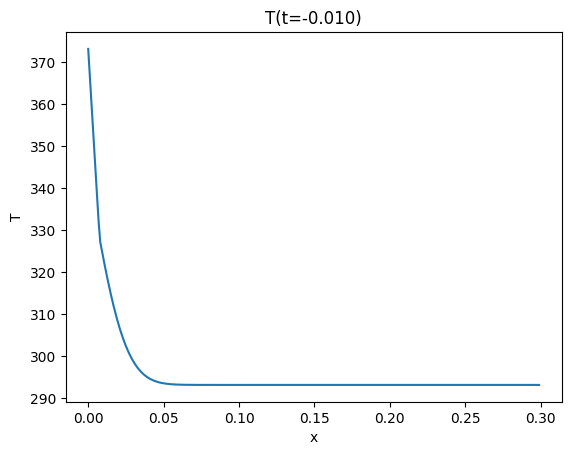

In [159]:
# Initieer oplossing
T = np.empty((k_max, i_max))

# Initiele waarden
T.fill(T_0)

# Randvoorwaarden
T[:,:1] = T_x0

def calculate_T(T):
    try:
        for k in tqdm(range(0, k_max-1)):
            for i in range(1, i_max-1):

                cfl_term = l_phi(T[k,i+1]) * dt / (dx**2 * cA(T[k,i]))
                if cfl_term > 0.5:
                    raise ValueError(f"CFL condition violated: {cfl_term}. Reduce dt or increase dx.")
            

                T[k + 1, i] = T[k,i] + (dt/dx**2/cA(T[k,i]))*((l_phi(T[k,i+1])-l_phi(T[k,i]))*(T[k,i+1]-T[k,i])+l_phi(T[k,i])*(T[k,i+1]-2*T[k,i]+T[k,i-1]))

    except Exception:
        return T
    return T

T = calculate_T(T)
print(T[-1,:])

def plot_grid(T_k, k):
    plt.figure()
    plt.title(f"T(t={k*dt:.3f})")
    plt.xlabel("x")
    plt.ylabel("T")
    plt.plot(np.arange(0,x,dx), T_k)
    plt.show()

k = 0
plot_grid(T[k,:], k)

k = int(k_max/2)
plot_grid(T[k,:], k)

k = -1
plot_grid(T[k,:], k)